[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JMAdKhFV0gHSBAN1yRzTkOZ9C90I8Wj4?usp=sharing)

##Group14
##LAB 7 Gale-Shapley and Irving Algorithms (Groups)  [part of the first test]

1) Find the best and worst cases for the Gale-Shapley and Irving (An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

#Gale - Shapley Algorithm

In [1]:
#source https://www.geeksforgeeks.org/stable-marriage-problem/
# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1, N):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def gale_shapley_sma(prefer, N):

    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N

    # While there are free men
    while (freeCount > 0):

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1, N) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1

            # End of Else
        # End of the for loop that goes
        # to all women in m's list
    # End of main while loop

    # Print solution
    print("Woman ", " Man")
    for i in range(N):
        print(i + N, "\t", wPartner[i])

In [2]:
import numpy as np
#N = 4
n = 4
mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
wpref = [ list(np.random.permutation(n)) for i in range(n) ]
pref_l = mpref + wpref
print("n = 4")
gale_shapley_sma(pref_l, n)
print()

#N = 40
n = 40
mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
wpref = [ list(np.random.permutation(n)) for i in range(n) ]
pref_l = mpref + wpref
print("n = 40")
gale_shapley_sma(pref_l, n)

n = 4
Woman   Man
4 	 0
5 	 3
6 	 2
7 	 1

n = 40
Woman   Man
40 	 28
41 	 11
42 	 9
43 	 14
44 	 17
45 	 18
46 	 26
47 	 5
48 	 37
49 	 7
50 	 23
51 	 2
52 	 4
53 	 36
54 	 0
55 	 24
56 	 29
57 	 19
58 	 6
59 	 30
60 	 1
61 	 31
62 	 16
63 	 10
64 	 15
65 	 39
66 	 3
67 	 38
68 	 13
69 	 33
70 	 22
71 	 20
72 	 8
73 	 25
74 	 32
75 	 21
76 	 27
77 	 35
78 	 12
79 	 34


#Irving Algorithm

In [3]:
#Inspired from "The Stable Marriage Problem. MIT Press Gusfield D., Irving Robert W." code snippet.
def irving_rhma(rpref, hpref):
  #track of r with h. dict for indexing
  n = len(rpref)
  ravl = [ -1 for i in range(n) ]
  havl = dict()
  while ravl.count(-1) != 0:
    for r in range(n):
      if ravl[r] == -1:
        h = rpref[r][0]
        rpref[r].pop(0) #dscrd
        if h not in havl:
          havl[h] = r
          ravl[r] = h
        else:
          dsp_r = havl[h]
          chpref = hpref[h]
          if chpref.index(r) < chpref.index(dsp_r):
            havl[h] = r
            ravl[r] = h
            ravl[dsp_r] = -1
  return ravl

In [4]:
import numpy as np
#N = 4
n = 4
rpref = [ list(np.random.permutation(n)) for i in range(n) ]
hpref = [ list(np.random.permutation(n)) for i in range(n) ]
print(f"r. match. n = 4: {irving_rhma(rpref, hpref)}")

#N = 40
n = 40
rpref = [ list(np.random.permutation(n)) for i in range(n) ]
hpref = [ list(np.random.permutation(n)) for i in range(n) ]
print(f"r. match n = 40: {irving_rhma(rpref, hpref)}")

r. match. n = 4: [1, 0, 2, 3]
r. match n = 40: [6, 16, 1, 24, 38, 26, 4, 35, 5, 18, 0, 21, 11, 13, 25, 36, 8, 28, 29, 2, 23, 12, 27, 31, 22, 17, 15, 7, 33, 37, 20, 30, 34, 9, 3, 10, 39, 32, 19, 14]


2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [5]:
#source https://www.geeksforgeeks.org/stable-marriage-problem/
# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1, N):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def gale_shapley_sma_itr(prefer, N, iter):

    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N
    iter_i = 0
    # While there are free men
    while (freeCount > 0):

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1, N) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
            # End of Else
        # End of the for loop that goes
        # to all women in m's list
        iter_i += 1
    # End of main while loop
    iter.append(iter_i)
    return iter

For n = 4:
Min iterations: 4
Max iterations: 10
Average iterations: 5.14


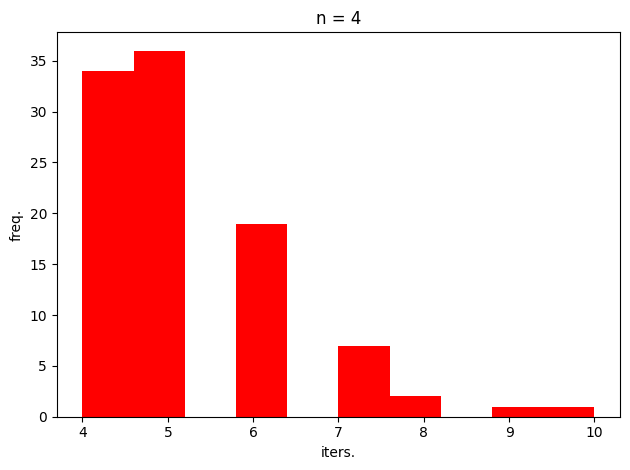

For n = 40:
Min iterations: 60
Max iterations: 105
Average iterations: 79.82


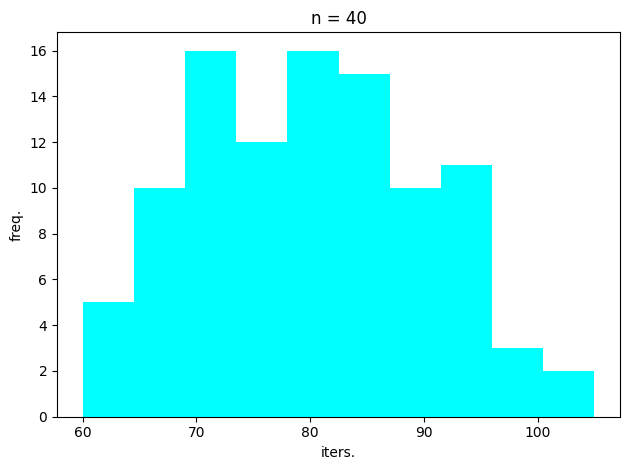

In [6]:
import numpy as np
import matplotlib.pyplot as plt

iter4 = []
#N = 4
n = 4
for i in range(100):
  pref_l = []
  mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
  wpref = [ list(np.random.permutation(n)) for i in range(n) ]
  pref_l = mpref + wpref
  iter4 = gale_shapley_sma_itr(pref_l, n, iter4)
print(f"For n = 4:\nMin iterations: {min(iter4)}\nMax iterations: {max(iter4)}\nAverage iterations: {sum(iter4) / 100}")
plt.hist(iter4, color="red", rwidth=4)
plt.title("n = 4")
plt.xlabel("iters.")
plt.ylabel("freq.")
plt.tight_layout()
plt.show()

#N = 40
iter40 = []
n = 40
for i in range(100):
  pref_l = []
  mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
  wpref = [ list(np.random.permutation(n)) for i in range(n) ]
  pref_l = mpref + wpref
  iter40 = gale_shapley_sma_itr(pref_l, n, iter40)
print(f"For n = 40:\nMin iterations: {min(iter40)}\nMax iterations: {max(iter40)}\nAverage iterations: {sum(iter40) / 100}")
plt.hist(iter40, color="cyan", rwidth=4)
plt.title("n = 40")
plt.xlabel("iters.")
plt.ylabel("freq.")
plt.tight_layout()
plt.show()

3) Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with R

#Gale - Shapley Algorithm gif

In [7]:
#Source, in its majority, taken from https://github.com/Daniel1309-gon.
from PIL import Image, ImageDraw
import numpy as np
import random

def gale_shapley_animation(preferences):
    n = len(preferences)
    men = list(range(n))
    women = list(range(n))
    engagements = {}
    snapshots = []  # Store snapshots for GIF

    while len(engagements) < n:
        snapshot = draw_snapshot(engagements, men, women, n)
        snapshots.append(snapshot)

        if not men:
            break  # Terminate if all men are engaged

        man = men.pop(0)
        if not preferences[man]:
            continue  # Skip if the preference list is empty
        woman = preferences[man].pop(0)
        current_engagement = engagements.get(woman)
        if current_engagement is None:
            engagements[woman] = man
        else:
            woman_preferences = preferences[woman]
            if man in woman_preferences and current_engagement in woman_preferences:
                if woman_preferences.index(man) < woman_preferences.index(current_engagement):
                    engagements[woman] = man
                    men.append(current_engagement)

    # Ensure all women are engaged
    for woman in women:
        if woman not in engagements:
            engagements[woman] = None  # Assign None to unengaged women

    return snapshots

def draw_snapshot(engagements, men, women, n):
    img = Image.new("RGB", (2000, 100), (178, 190, 181))
    draw = ImageDraw.Draw(img)
    cell_size = 50

    for i in range(n):
        draw.rectangle([(i * cell_size, 0), ((i + 1) * cell_size, cell_size)], outline="black")
        draw.rectangle([(i * cell_size, cell_size), ((i + 1) * cell_size, cell_size * 2)], outline="black")
        man = engagements.get(i)
        if man is not None:
            if man is not None:
                draw.text(((i * cell_size) + 10, 10), f"Man{man}", fill="black")
        draw.text(((i * cell_size) + 10, cell_size + 10), f"Woman{i}", fill="red")

    return img

#When n = 4 needed
#n = 4
#pref = [ list(np.random.permutation(n)) for i in range(n) ]
#preferences = dict(zip(list(range(n)), pref))
#snapshots = gale_shapley_animation(preferences)

#snapshots[0].save(
#    "gale_shapley_animation4.gif",
#    save_all=True,
#    append_images=snapshots[1:],
#    loop=0,
#    duration=400,
#)

n = 40
pref = [ list(np.random.permutation(n)) for i in range(n) ]
preferences = dict(zip(list(range(n)), pref))
snapshots = gale_shapley_animation(preferences)

snapshots[0].save(
    "gale_shapley_animation40.gif",
    save_all=True,
    append_images=snapshots[1:],
    loop=0,
    duration=400,
)

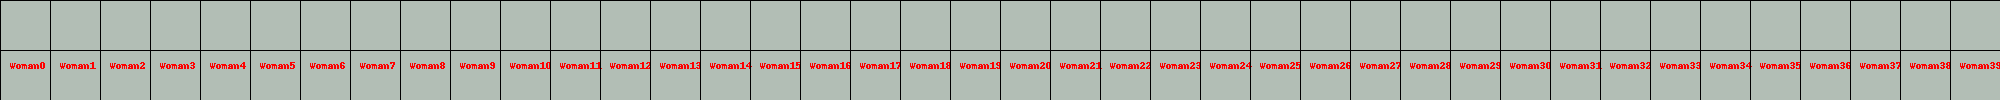

In [8]:
#gif from n = 40 Gale - Shapley algorithm
from IPython.display import Image
from IPython.display import display
display(Image(filename='gale_shapley_animation40.gif'))

#Irving Algorithm gif

In [9]:
#Source, in its majority, taken from https://github.com/Daniel1309-gon.
from PIL import Image, ImageDraw
import numpy as np
import random

def irving_animation(preferences):
    n = len(preferences)
    men = list(range(n))
    women = list(range(n))
    engagements = {}
    proposals = {man: {} for man in men}
    snapshots = []  # Store snapshots for GIF

    while len(engagements) < n:
        snapshot = draw_snapshot(engagements, men, women, n)
        snapshots.append(snapshot)

        if not men:
            break  # Terminate if all men are engaged

        man = men.pop(0)
        while True:
            woman = preferences[man].pop(0)
            if woman not in proposals[man]:
                proposals[man][woman] = True
                current_engagement = engagements.get(woman)
                if current_engagement is None:
                    engagements[woman] = man
                    break
                else:
                    woman_preferences = preferences[woman]
                    if man in woman_preferences and current_engagement in woman_preferences:
                        if woman_preferences.index(man) < woman_preferences.index(current_engagement):
                            engagements[woman] = man
                            men.append(current_engagement)
                            break

    # Ensure all women are engaged
    for woman in women:
        if woman not in engagements:
            engagements[woman] = None  # Assign None to unengaged women

    return snapshots

def draw_snapshot(engagements, men, women, n):
    img = Image.new("RGB", (2000, 100), (77, 77, 255))
    draw = ImageDraw.Draw(img)
    cell_size = 50

    for i in range(n):
        draw.rectangle([(i * cell_size, 0), ((i + 1) * cell_size, cell_size)], outline="black")
        draw.rectangle([(i * cell_size, cell_size), ((i + 1) * cell_size, cell_size * 2)], outline="black")
        man = engagements.get(i)
        if man is not None:
            if man is not None:
                draw.text(((i * cell_size) + 10, 10), f"Man{man}", fill="white")
        draw.text(((i * cell_size) + 10, cell_size + 10), f"Woman{i}", fill="black")

    return img


#When n = 4 needed
#n = 4
#pref = [ list(np.random.permutation(n)) for i in range(n) ]
#preferences = dict(zip(list(range(n)), pref))
#snapshots = irving_animation(preferences)

#snapshots[0].save(
#    "irving_animation4.gif",
#    save_all=True,
#    append_images=snapshots[1:],
#    loop=0,
#    duration=400,
#)

n = 40
pref = [ list(np.random.permutation(n)) for i in range(n) ]
preferences = dict(zip(list(range(n)), pref))
snapshots = irving_animation(preferences)

snapshots[0].save(
    "irving_animation40.gif",
    save_all=True,
    append_images=snapshots[1:],
    loop=0,
    duration=400,
)

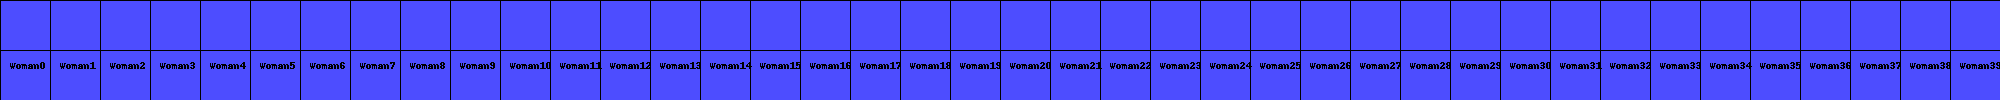

In [10]:
#gif from n = 40 Irving algorithm
from IPython.display import Image
from IPython.display import display
display(Image(filename='irving_animation40.gif'))